In [10]:
import random
class JogoDeForca:
    def __init__(self):
        import requests
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n')
        else:
            print("Erro: ", r.status_code)
    
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content)
        return len(self.palavra)

    def tentar_letra(self, letra):
        if self.vidas > 0:
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra]
            else:
                self.vidas -= 1
                if self.vidas == 0:
                    print("Fim de jogo!")
                    return False
                else:
                    return []
        
    def tentar_palavra(self, palavra):
        if self.vidas > 0:
            if self.palavra == palavra:
                print ("Ganhou!")
                return True
            else:
                self.vidas = 0
                print("Fim de jogo!")
                return False

jogo = JogoDeForca()
print(jogo.novo_jogo())
print(jogo.palavra)
print(jogo.vidas)
print(jogo.tentar_letra('b'))
print(jogo.tentar_letra('a'))
print(jogo.tentar_letra('w'))
print(jogo.vidas)

10
escoltaram
5
[]
[6, 8]
[]
3


In [11]:
import requests
import random
from collections import Counter
import math

class JogadorAutomatico:
    def __init__(self):
        # Baixa o vocabulário permitido
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        response = requests.get(url)
        if response.status_code == 200:
            self.vocabulario = response.text.splitlines()
        else:
            raise Exception("Erro ao baixar vocabulário.")

    def calcular_probabilidades(self, palavras_possiveis):
        # Calcula a frequência de cada letra nas palavras possíveis
        todas_letras = ''.join(palavras_possiveis)
        frequencias = Counter(todas_letras)
        total_letras = sum(frequencias.values())
        
        # Retorna as probabilidades de cada letra
        return {letra: frequencias[letra] / total_letras for letra in frequencias}

    def escolher_melhor_letra(self, palavras_possiveis, letras_tentadas):
        # Calcula probabilidades e escolhe a letra mais frequente que ainda não foi tentada
        probabilidades = self.calcular_probabilidades(palavras_possiveis)
        melhor_letra = max((letra for letra in probabilidades if letra not in letras_tentadas), 
                           key=lambda letra: probabilidades[letra], 
                           default=None)
        return melhor_letra

    def jogar(self, jogo):
        # Inicializa as variáveis do jogo
        palavra_tamanho = jogo.novo_jogo()
        palavras_possiveis = [palavra for palavra in self.vocabulario if len(palavra) == palavra_tamanho]
        letras_tentadas = set()
        
        while jogo.vidas > 0:
            # Escolhe a próxima letra
            letra = self.escolher_melhor_letra(palavras_possiveis, letras_tentadas)
            letras_tentadas.add(letra)
            
            # Tenta a letra e recebe os índices onde ela ocorre
            indices = jogo.tentar_letra(letra)
            if indices is False:
                # Fim do jogo se vidas chegaram a zero
                return False
            
            if len(indices) > 0:
                # Filtra palavras que correspondem à nova informação
                palavras_possiveis = [palavra for palavra in palavras_possiveis 
                                      if all(palavra[idx] == letra for idx in indices)]
            else:
                # Filtra palavras que não contêm a letra se a tentativa falhar
                palavras_possiveis = [palavra for palavra in palavras_possiveis if letra not in palavra]
            
            # Tentar adivinhar a palavra se houver alta certeza
            if len(palavras_possiveis) == 1:
                return jogo.tentar_palavra(palavras_possiveis[0])
        
        # Fim do jogo
        return False


Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Taxa de sucesso: 93.00%


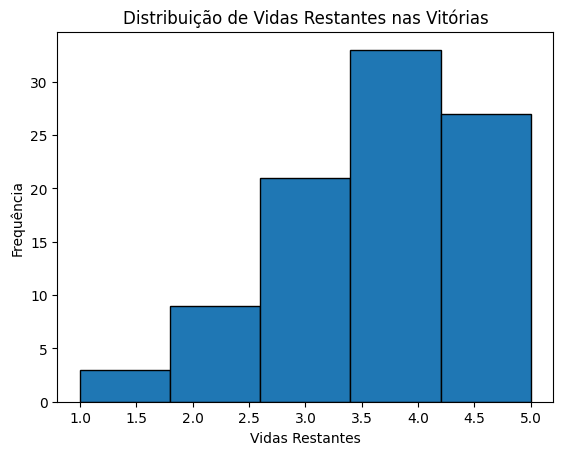

In [12]:
import matplotlib.pyplot as plt

def jogar_varios_jogos(n=100):
    vitorias = 0
    vidas_restantes = []
    for _ in range(n):
        jogo = JogoDeForca()
        jogador = JogadorAutomatico()
        resultado = jogador.jogar(jogo)
        if resultado:
            vitorias += 1
            vidas_restantes.append(jogo.vidas)
    
    taxa_sucesso = vitorias / n
    print(f"Taxa de sucesso: {taxa_sucesso * 100:.2f}%")
    plt.hist(vidas_restantes, bins=5, edgecolor='black')
    plt.title("Distribuição de Vidas Restantes nas Vitórias")
    plt.xlabel("Vidas Restantes")
    plt.ylabel("Frequência")
    plt.show()

# Executa o teste com 100 jogos
jogar_varios_jogos(100)
